In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('CallLog_20240525-203319.csv')

In [105]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,0:04:04
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,0:00:40
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,0:01:31
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,0:00:47
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,0:03:29
...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,0:00:55
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,0:02:33
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,0:00:58
2140,Voice,(705) 534-7770,NaN,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,0:01:11


In [106]:
df. isnull().sum()

Type                     0
Phone Number             1
Name                  1455
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Type                2142 non-null   object
 1   Phone Number        2141 non-null   object
 2   Name                687 non-null    object
 3   Date                2142 non-null   object
 4   Time                2142 non-null   object
 5   Action              2142 non-null   object
 6   Action Result       2142 non-null   object
 7   Result Description  292 non-null    object
 8   Duration            2142 non-null   object
dtypes: object(9)
memory usage: 150.7+ KB


In [108]:
df.describe(include='all')

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
count,2142,2141,687,2142,2142,2142,2142,292,2142
unique,1,794,188,7,621,2,10,6,382
top,Voice,(647) 774-8074,TORONTO ON,Wed 2024-05-22,12:21 PM,VoIP Call,Call connected,The caller hung up before the call was answered.,0:00:29
freq,2142,25,164,611,11,1793,1623,127,49


# DATA CLEANING

In [109]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\2991691273.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [110]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,0:04:04,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,0:00:40,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,0:01:31,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,0:00:47,2024-05-25 15:02:00
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,0:03:29,2024-05-25 13:44:00


In [111]:
#Convert 'Duration' to seconds, handle NaN values
df['Duration'] = pd.to_timedelta(df['Duration'], errors='coerce').dt.total_seconds()

In [112]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,(705) 534-7770,NaN,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [113]:
#Handle missing values in 'Name' column
df['Name'].fillna('Unknown', inplace=True)

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\3661429693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown', inplace=True)


In [114]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,(905) 655-6648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,(705) 534-7770,Unknown,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [115]:
#Standardize phone number format (removing any unwanted characters)
df['Phone Number'] = df['Phone Number'].str.replace(r'\D', '', regex=True)

In [116]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,2896802441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,6473904940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,6473904940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,7055347770,Unknown,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [117]:
#Ensure 'Type', 'Action', and 'Action Result' are categorical df types
df['Type'] = df['Type'].astype('category')
df['Action'] = df['Action'].astype('category')
df['Action Result'] = df['Action Result'].astype('category')

In [118]:
df.isnull().sum()

Type                     0
Phone Number             1
Name                     0
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
Datetime                 0
dtype: int64

In [119]:
# Fill or drop remaining NaN values as necessary
df['Duration'].fillna(0, inplace=True)

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\18625095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(0, inplace=True)


In [120]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00


In [121]:
#Split 'Datetime' back into 'Date' and 'Time' columns
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [122]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,2896802441,HAMILTON ON,2024-05-19,14:16:00,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,6473904940,TORONTO ON,2024-05-19,12:27:00,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,6473904940,TORONTO ON,2024-05-19,12:22:00,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,7055347770,Unknown,2024-05-19,09:07:00,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [123]:
# Drop the 'Datetime' column as it's no longer needed
df.drop(columns=['Datetime'], inplace=True)

In [124]:
#final inspection

print("Cleaned Data Head:\n", df.head())
print("Cleaned Data Info:\n", df.info())

Cleaned Data Head:
     Type Phone Number             Name        Date      Time      Action  \
0  Voice   4168201716  TORONTO      ON  2024-05-25  15:47:00   VoIP Call   
1  Voice   6473826778  TORONTO      ON  2024-05-25  15:34:00  Phone Call   
2  Voice   4168201716  TORONTO      ON  2024-05-25  15:25:00  Phone Call   
3  Voice   6472336658  TORONTO      ON  2024-05-25  15:02:00  Phone Call   
4  Voice   9056556648          Unknown  2024-05-25  13:44:00   VoIP Call   

    Action Result Result Description  Duration  
0  Call connected                NaN     244.0  
1          Missed                NaN      40.0  
2       Voicemail                NaN      91.0  
3          Missed                NaN      47.0  
4  Call connected                NaN     209.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Type              

In [125]:
# Basic statistics
print("Number of calls by type:\n", df['Type'].value_counts())
print("Number of calls by action result:\n", df['Action Result'].value_counts())

Number of calls by type:
 Type
Voice    2142
Name: count, dtype: int64
Number of calls by action result:
 Action Result
Call connected    1623
Missed             148
Hang Up            127
Accepted           122
Voicemail           76
Wrong Number        23
No Answer           11
Busy                 5
NotAllowed           4
Rejected             3
Name: count, dtype: int64


In [126]:
# Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Type                     0
Phone Number             1
Name                     0
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
dtype: int64


In [127]:
#Handle missing values in 'Result Description' column
df['Result Description'].fillna('No Description', inplace=True)

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\1003706661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Result Description'].fillna('No Description', inplace=True)


In [128]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,No Description,244.0
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,No Description,40.0
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,No Description,91.0
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,No Description,47.0
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,No Description,209.0


In [129]:
df.isnull().sum()

Type                  0
Phone Number          1
Name                  0
Date                  0
Time                  0
Action                0
Action Result         0
Result Description    0
Duration              0
dtype: int64

# VISUALIZATION PART

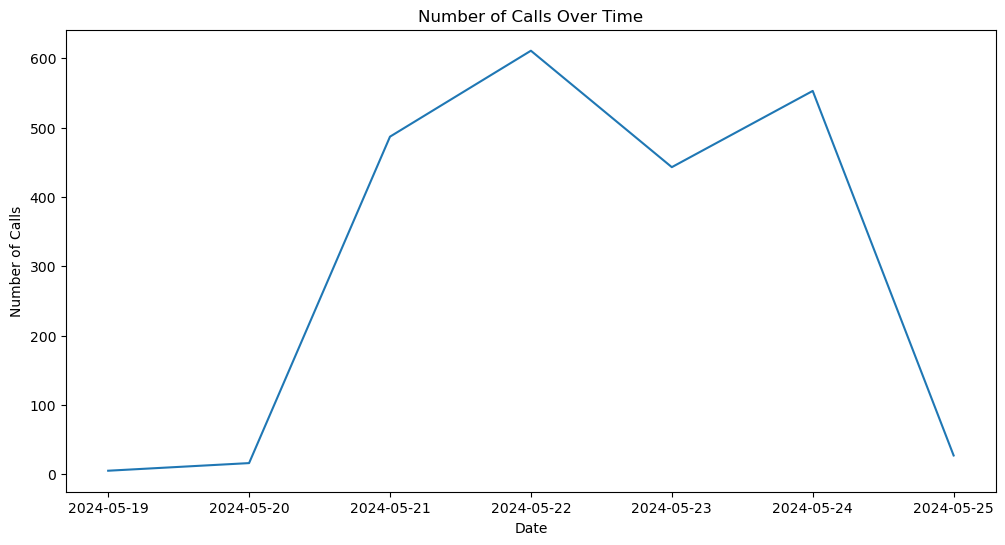

In [130]:
# Calls over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.groupby('Date').size().plot()
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


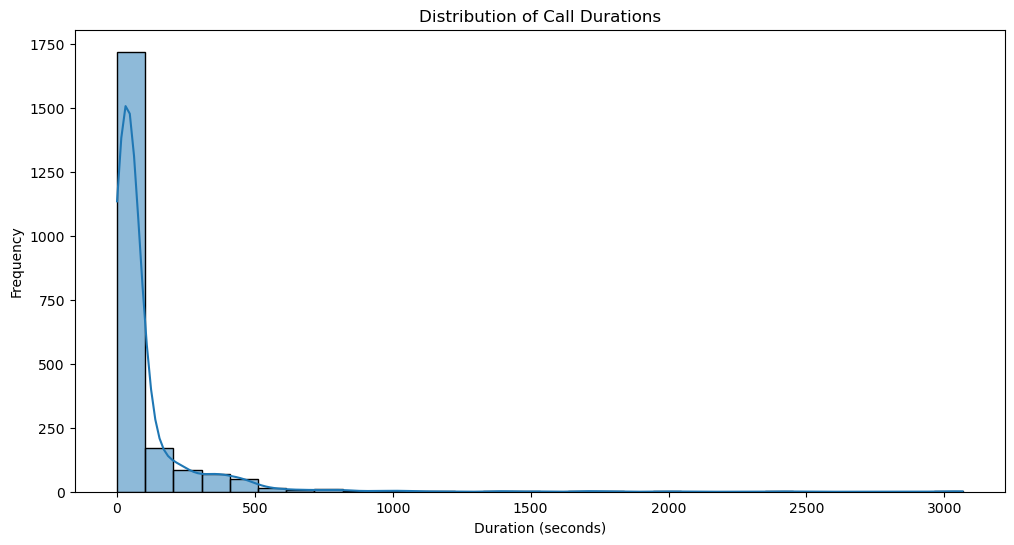

In [131]:
# Distribution of call durations
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Call Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


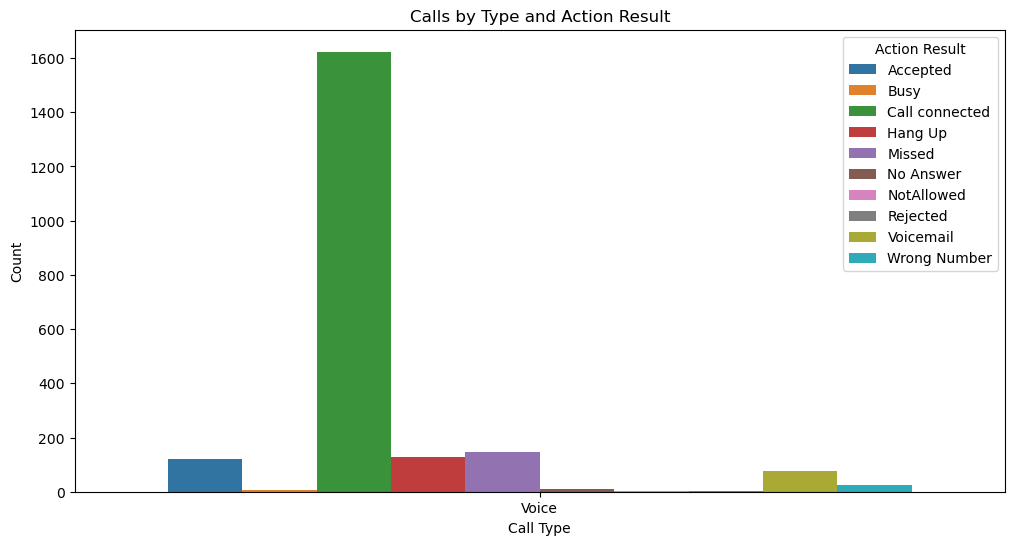

In [132]:
# Calls by type and action result
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Action Result', data=df)
plt.title('Calls by Type and Action Result')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.show()

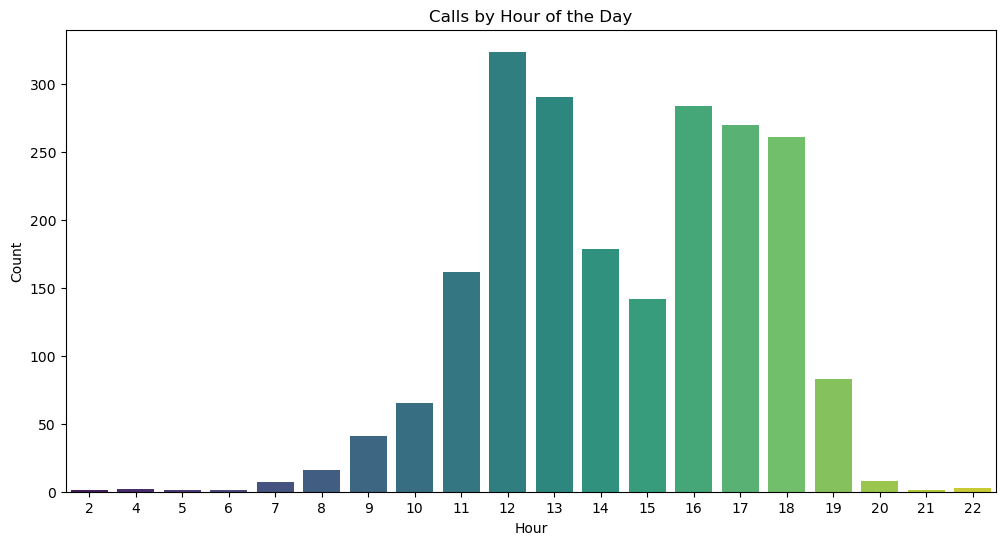

In [133]:
# Calls by hour of the day
plt.figure(figsize=(12, 6))
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Calls by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

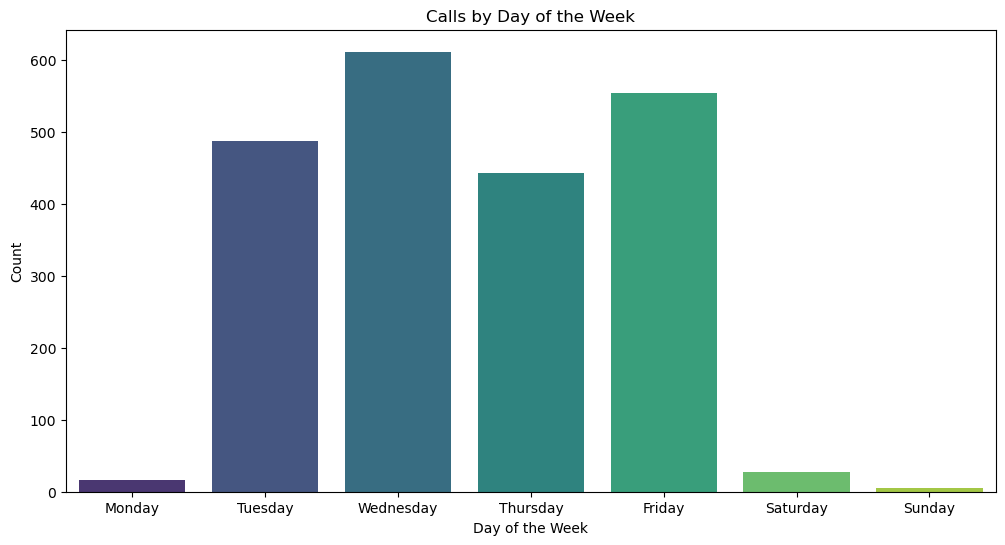

In [134]:
# Calls by day of the week
plt.figure(figsize=(12, 6))
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

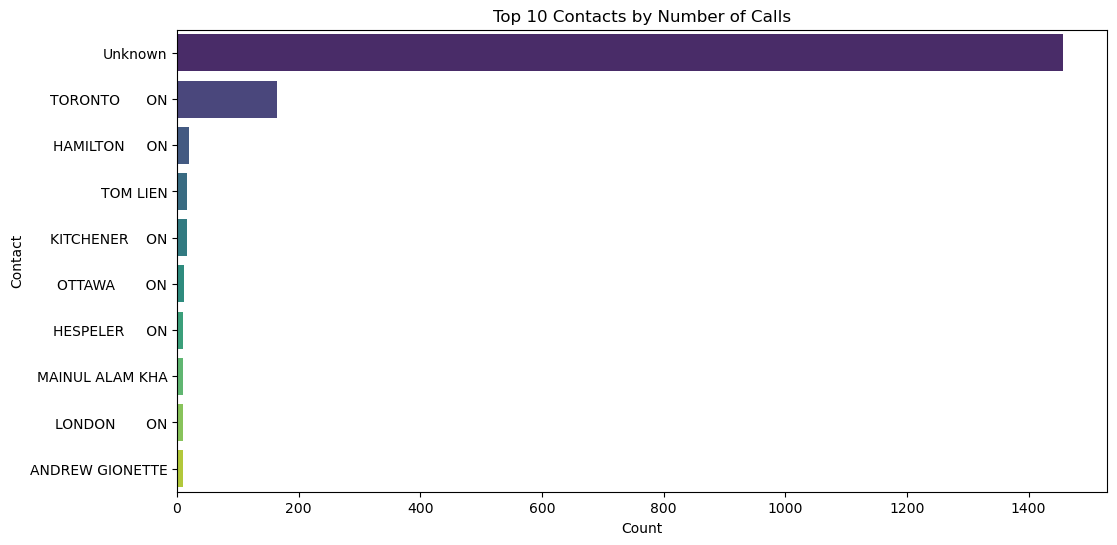

In [135]:
# Calls by contact
plt.figure(figsize=(12, 6))
top_contacts = df['Name'].value_counts().nlargest(10).index
sns.countplot(y='Name', data=df[df['Name'].isin(top_contacts)], order=top_contacts, palette='viridis')
plt.title('Top 10 Contacts by Number of Calls')
plt.xlabel('Count')
plt.ylabel('Contact')
plt.show()

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\3817266298.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_outcomes = df.groupby(['Hour', 'Action Result']).size().unstack().fillna(0)


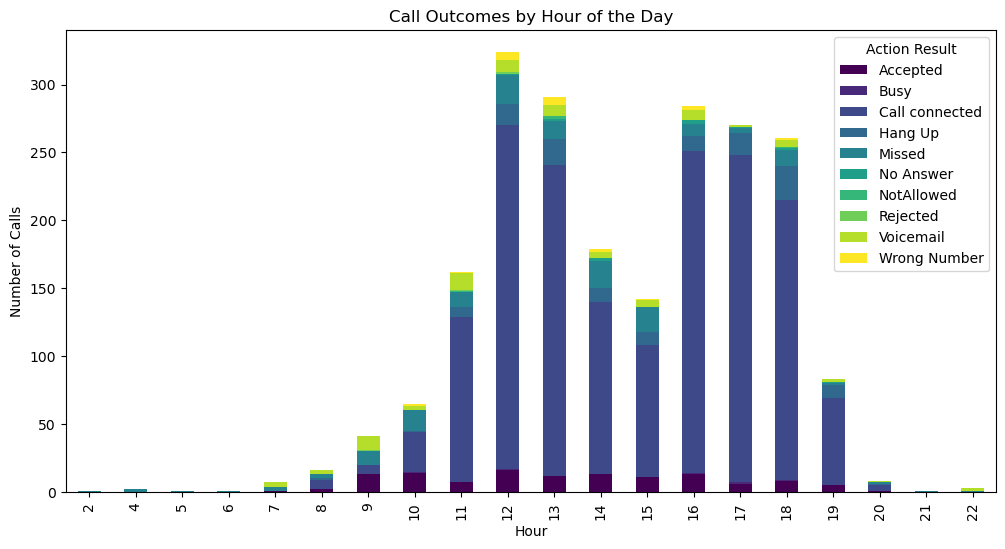

In [136]:
# Call Outcomes by Day and Time
plt.figure(figsize=(12, 6))
hourly_outcomes = df.groupby(['Hour', 'Action Result']).size().unstack().fillna(0)
hourly_outcomes.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Call Outcomes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\2527932.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_outcomes = df.groupby(['DayOfWeek', 'Action Result']).size().unstack().fillna(0)


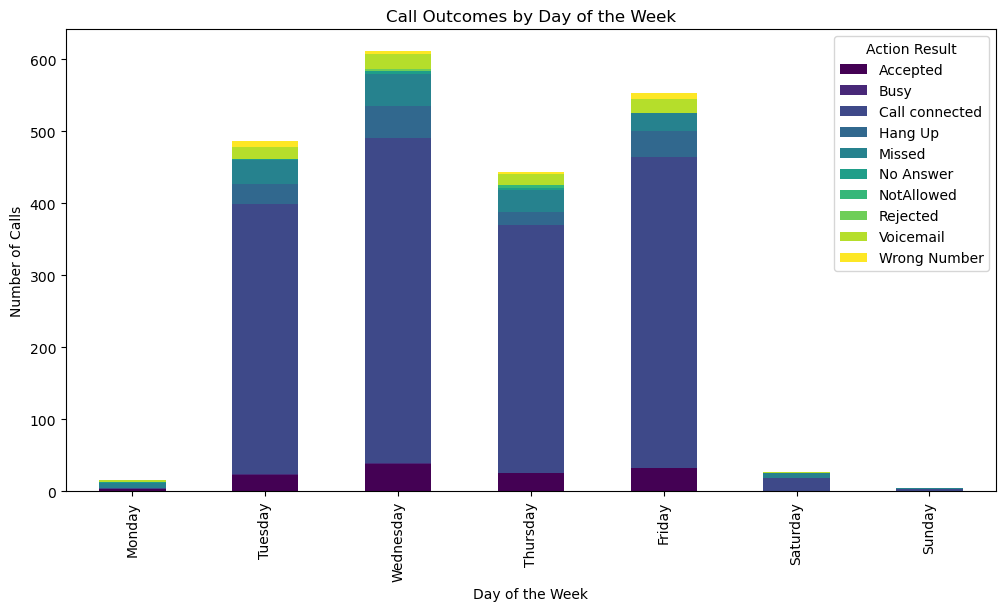

In [137]:
plt.figure(figsize=(12, 6))
daily_outcomes = df.groupby(['DayOfWeek', 'Action Result']).size().unstack().fillna(0)
daily_outcomes = daily_outcomes.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_outcomes.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Call Outcomes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()

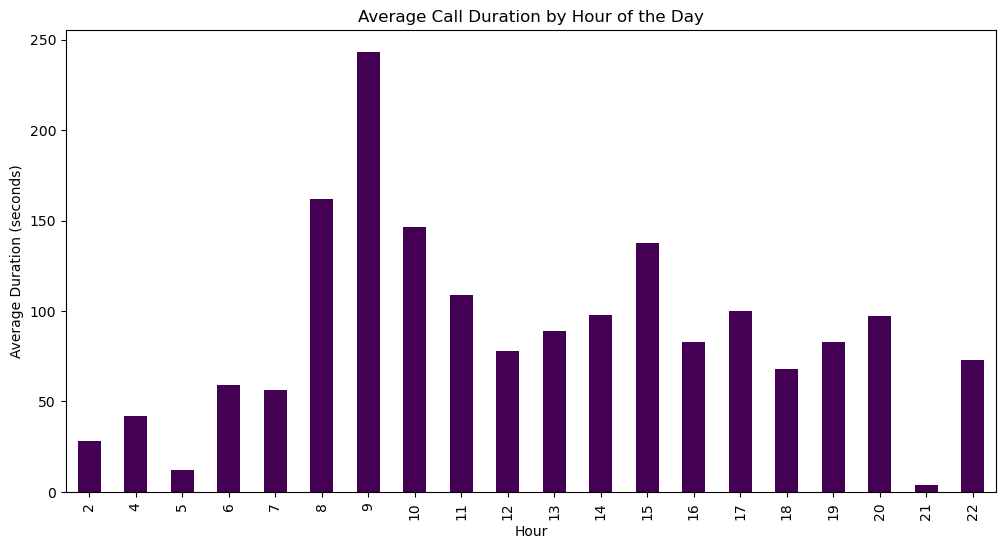

In [138]:
# Average Call Duration by Hour/Day
plt.figure(figsize=(12, 6))
avg_duration_hour = df.groupby('Hour')['Duration'].mean()
avg_duration_hour.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Call Duration by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Duration (seconds)')
plt.show()

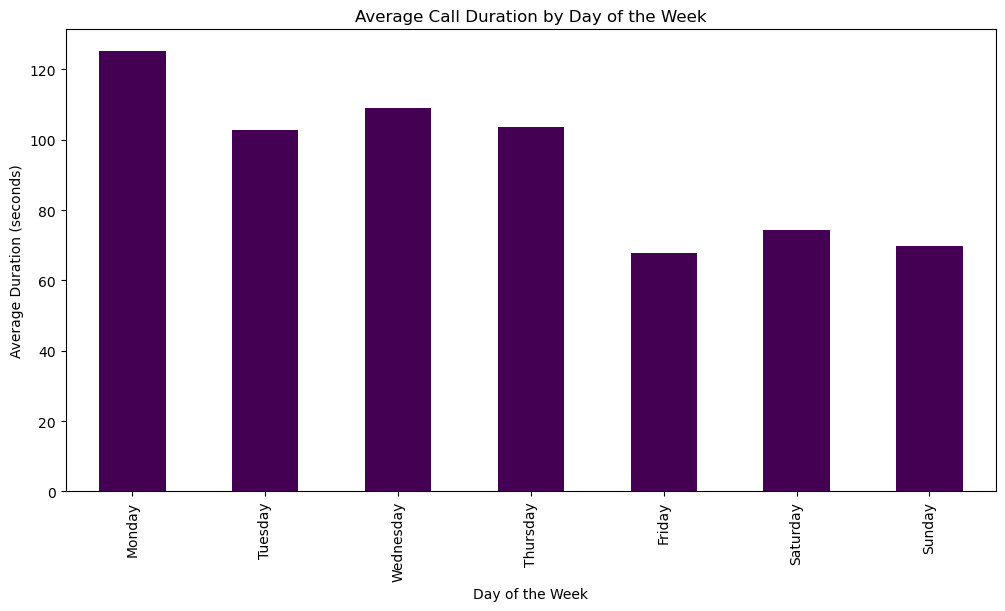

In [139]:
plt.figure(figsize=(12, 6))
avg_duration_day = df.groupby('DayOfWeek')['Duration'].mean()
avg_duration_day = avg_duration_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_duration_day.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Call Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (seconds)')
plt.show()

C:\Users\umesh\AppData\Local\Temp\ipykernel_17792\1958572449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  call_outcomes_time = df.groupby(['Date', 'Action Result']).size().unstack().fillna(0)


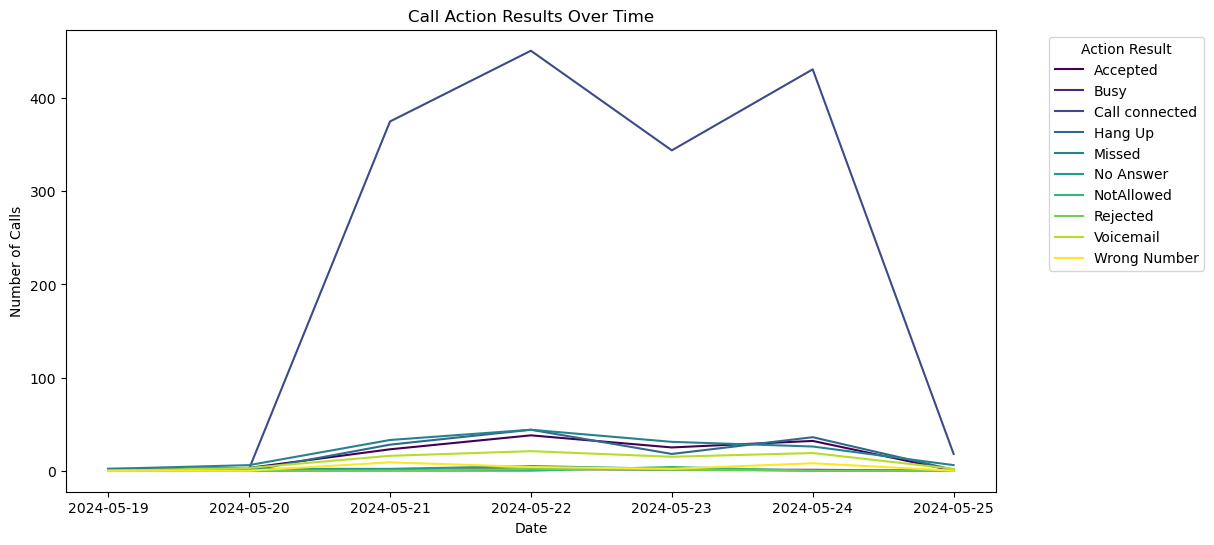

In [140]:
# Call Action Results Over Time
plt.figure(figsize=(12, 6))
call_outcomes_time = df.groupby(['Date', 'Action Result']).size().unstack().fillna(0)
call_outcomes_time.plot(kind='line', colormap='viridis', ax=plt.gca())
plt.title('Call Action Results Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(title='Action Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

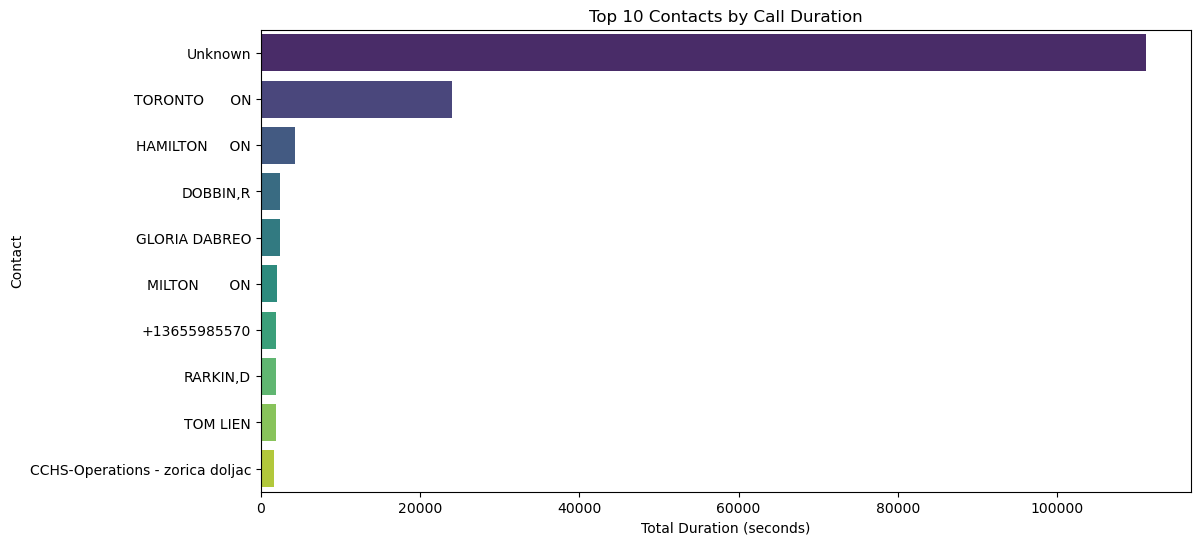

In [141]:
# Top 10 Contacts by Call Duration
plt.figure(figsize=(12, 6))
top_contacts_duration = df.groupby('Name')['Duration'].sum().nlargest(10).index
sns.barplot(y=top_contacts_duration, x=df[df['Name'].isin(top_contacts_duration)].groupby('Name')['Duration'].sum().sort_values(ascending=False), palette='viridis')
plt.title('Top 10 Contacts by Call Duration')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Contact')
plt.show()

In [142]:
# Identify peak call hours (for example, 9 AM to 6 PM)
peak_hours = df[(df['Hour'] >= 9) & (df['Hour'] <= 18)]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


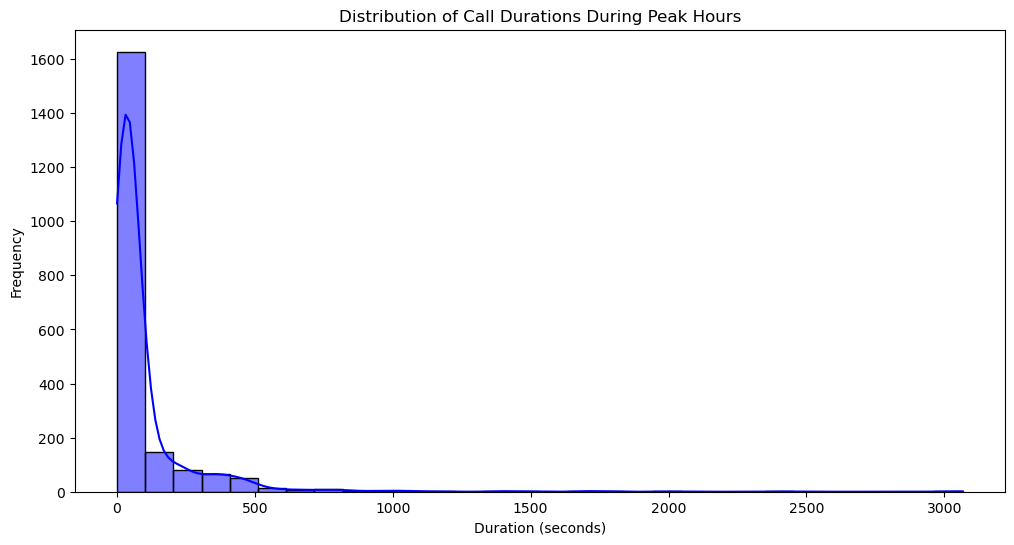

In [143]:
# Plot histogram of call durations during peak hours
plt.figure(figsize=(12, 6))
sns.histplot(peak_hours['Duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Call Durations During Peak Hours')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [144]:
# Feature Engineering

In [145]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Hour,DayOfWeek
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,No Description,244.0,15,Saturday
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,No Description,40.0,15,Saturday
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,No Description,91.0,15,Saturday
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,No Description,47.0,15,Saturday
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,No Description,209.0,13,Saturday


In [146]:
# Categorize calls based on duration
def categorize_duration(seconds):
    if seconds < 60:
        return 'Short'
    elif 60 <= seconds <= 300:
        return 'Medium'
    else:
        return 'Long'

In [147]:
df['CallDurationCategory'] = df['Duration'].apply(categorize_duration)

In [151]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Hour,DayOfWeek,CallDurationCategory
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,No Description,244.0,15,Saturday,Medium
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,No Description,40.0,15,Saturday,Short
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,No Description,91.0,15,Saturday,Medium
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,No Description,47.0,15,Saturday,Short
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,No Description,209.0,13,Saturday,Medium


In [152]:
# Define the hour range for peak hours (e.g., 9 AM to 5 PM)
start_hour = 9
end_hour = 17

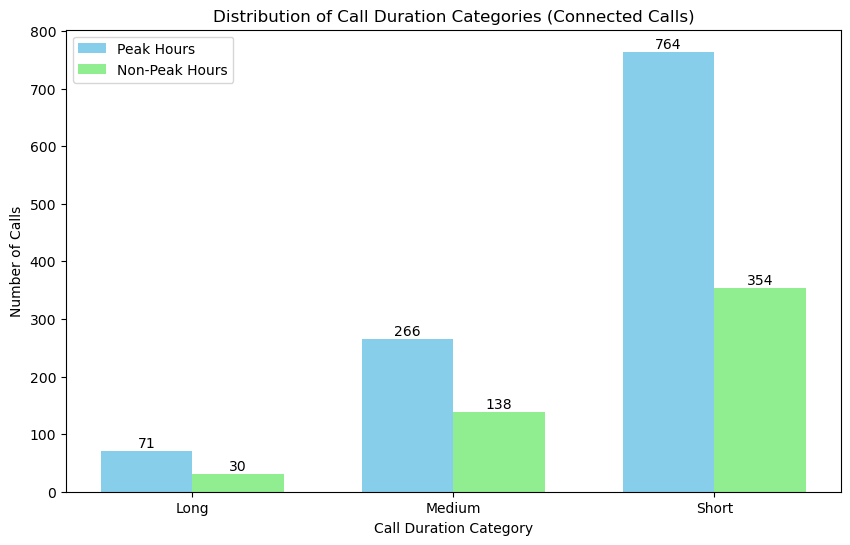

In [158]:
# Filter data to include only calls where 'Action Result' is 'Call connected'
connected_calls = df[df['Action Result'] == 'Call connected']

# Further filter calls into peak and non-peak hours
peak_calls = connected_calls[(connected_calls['Hour'] >= start_hour) & (connected_calls['Hour'] < end_hour)]
non_peak_calls = connected_calls[(connected_calls['Hour'] < start_hour) | (connected_calls['Hour'] >= end_hour)]

# Count the categories for peak and non-peak calls
peak_category_counts = peak_calls['CallDurationCategory'].value_counts().sort_index()
non_peak_category_counts = non_peak_calls['CallDurationCategory'].value_counts().sort_index()

# Create a bar plot for both peak and non-peak call duration categories
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(peak_category_counts))

bar1 = ax.bar(index, peak_category_counts, bar_width, label='Peak Hours', color='skyblue')
bar2 = ax.bar([i + bar_width for i in index], non_peak_category_counts, bar_width, label='Non-Peak Hours', color='lightgreen')

ax.set_title('Distribution of Call Duration Categories (Connected Calls)')
ax.set_xlabel('Call Duration Category')
ax.set_ylabel('Number of Calls')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(peak_category_counts.index)
ax.legend()

# Add the number of calls above each bar
for i, v in enumerate(peak_category_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
for i, v in enumerate(non_peak_category_counts):
    ax.text(i + bar_width, v + 1, str(v), ha='center', va='bottom')

plt.show()

In [160]:
import numpy as np

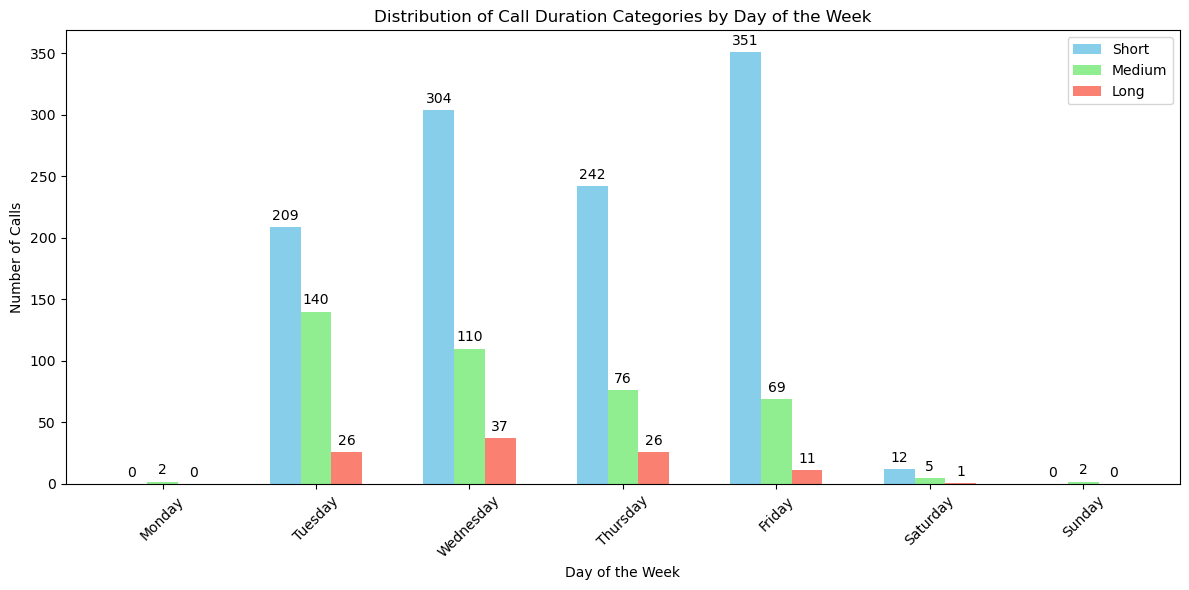

In [161]:
# Filter connected calls
connected_calls = df[df['Action Result'] == 'Call connected']

# Further filter calls into peak and non-peak hours (if needed)
# peak_calls = connected_calls[(connected_calls['Hour'] >= start_hour) & (connected_calls['Hour'] < end_hour)]
# non_peak_calls = connected_calls[(connected_calls['Hour'] < start_hour) | (connected_calls['Hour'] >= end_hour)]

# Count the categories for each day of the week
day_category_counts = connected_calls.groupby('DayOfWeek')['CallDurationCategory'].value_counts().unstack().fillna(0)

# Reorder the days of the week for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_category_counts = day_category_counts.reindex(day_order)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(day_order))

bar1 = ax.bar(index - bar_width, day_category_counts['Short'], bar_width, label='Short', color='skyblue')
bar2 = ax.bar(index, day_category_counts['Medium'], bar_width, label='Medium', color='lightgreen')
bar3 = ax.bar(index + bar_width, day_category_counts['Long'], bar_width, label='Long', color='salmon')

ax.set_title('Distribution of Call Duration Categories by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Calls')
ax.set_xticks(index)
ax.set_xticklabels(day_order, rotation=45)
ax.legend()

# Add labels above each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
